In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:
grants_analysis = pd.read_csv('for_analysis.csv', compression = 'gzip')
grants_analysis.info()
grants_analysis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84591 entries, 0 to 84590
Data columns (total 19 columns):
application_id       84591 non-null int64
activity             84574 non-null object
application_type     82964 non-null float64
arra_funded          84574 non-null object
funding_ics          84436 non-null object
funding_mechanism    84558 non-null object
fy                   84591 non-null int64
nih_spending_cats    73811 non-null object
project_start        70517 non-null object
project_end          70780 non-null object
project_terms        81585 non-null object
study_section        78863 non-null object
support_year         82964 non-null float64
funds                82464 non-null float64
pi_ids               84358 non-null float64
num_pis              84591 non-null int64
org_name             84275 non-null object
org_country          84338 non-null object
org_zipcode          84165 non-null object
dtypes: float64(4), int64(3), object(12)
memory usage: 12.3+ MB


(84591, 19)

In [103]:
col_info = pd.read_csv('grant_col_info_all.csv')
pd.set_option('display.max_colwidth', 500)
col_info.ix[col_info['column_name'].str.contains('funding')]
pd.set_option('display.max_colwidth', 50)

,column_name,descriptions
13,funding_ic(s),"The NIH Institute or Center(s) providing funding for a project are designated by their acronyms (see Institute/Center acronyms ). Each funding IC is followed by a colon (:) and the amount of funding provided for the fiscal year by that IC. Multiple ICs are separated by semicolons (;). Project funding information is available only for NIH, CDC, and FDA projects ."
14,funding_mechanism,"The major mechanism categories used in NIH Budget mechanism tables for the President’s budget. Extramural research awards are divided into three main funding mechanisms: grants, cooperative agreements and contracts. A funding mechanism is the type of funded application or transaction used at the NIH. Within each funding mechanism NIH includes programs. Programs can be further refined by specific activity codes."


In [104]:
grants_analysis.isnull().sum()

application_id           0
activity                17
application_type      1627
arra_funded             17
funding_ics            155
funding_mechanism       33
fy                       0
nih_spending_cats    10780
project_start        14074
project_end          13811
project_terms         3006
study_section         5728
support_year          1627
funds                 2127
pi_ids                 233
num_pis                  0
org_name               316
org_country            253
org_zipcode            426
dtype: int64

Most nulls will not affect the ability to identify who the grant was awarded to. The identification columns are application_id (no nulls), pi_ids, org_name, org_country and org_zipcode. org_zipcode has the most nulls, but this is because several countries did not list a zipcode. The second largest column of the identiers is org_name.

In [105]:
org_null = grants_analysis.ix[grants_analysis['org_name'].isnull()]
org_null['funding_mechanism'].value_counts()

non sbir/sttr contracts    148
interagency agreements     124
intramural research         23
sbir/sttr contracts          4
Name: funding_mechanism, dtype: int64

Non-US countries awarded with NIH grants.

In [74]:
#grants_analysis.ix[grants_analysis['org_country'] != 'united states'].org_country.value_counts()

In [75]:
def to_string(df, col_list):
    for col in col_list:
        df[col] = df[col].astype(str)
    return df

cols = ['application_id', 'activity', 'application_type', 'fy', 'support_year', 'pi_ids']
grants_analysis = to_string(grants_analysis, col_list = cols)

In [106]:
print('The total amount of funding awarded by the NIH in 2016 was $' + \
      '{0:,}'.format(grants_analysis['funds'].sum()) + ' for ' \
     + '{0:,}'.format(len(grants_analysis)) + ' total grants.')

print('Approximately $' + '{0:,}'.format(round(grants_analysis['funds'].sum() / len(grants_analysis))) + \
      ' were awarded per grant on average.')

print('{0:,}'.format(grants_analysis['pi_ids'].value_counts().count()) + ' unique PIs and ' + \
      str(grants_analysis['org_name'].value_counts().count()) + ' unique organizations were listed.')

The total amount of funding awarded by the NIH in 2016 was $35,261,559,762.0 for 84,591 total grants.
Approximately $416,848.0 were awarded per grant on average.
48,752 unique PIs and 3210 unique organizations were listed.


## Groupby grant series

In [77]:
series = list(grants_analysis['activity'])
for i in range(len(series)):
    series[i] = series[i][0]

In [78]:
pd.set_option('display.max_columns', 50)
grants_analysis['series'] = series
grants_analysis.head(2)

,application_id,activity,application_type,arra_funded,full_project_num,funding_ics,funding_mechanism,fy,nih_spending_cats,project_start,project_end,project_terms,study_section,support_year,funds,pi_ids,num_pis,org_name,org_country,org_zipcode,series
0,9115627,k23,4.0,n,4k23gm104401-04,nigms,other research-related,2016,atherosclerosis; biotechnology; cardiovascular...,2013-08-01,2017-07-31,abcb1 gene; accounting; acute coronary syndrom...,ghd,4.0,194460.0,10799126.0,1,icahn school of medicine at mount sinai,united states,100296574,k
1,9128072,r01,4.0,n,4r01ns085165-04,ninds,non-sbir/sttr rpgs,2016,biotechnology; complementary and alternative m...,2013-09-30,2018-07-31,acute; analog; antioxidants; attenuation; bind...,nomd,4.0,335781.0,7017365.0,1,university of maryland baltimore,united states,212011508,r


In [79]:
by_series = grants_analysis.groupby('series', axis = 0)
by_series.describe()

funds       num_pis
series                                  
d      count  5.090000e+02    509.000000
       mean   6.198296e+05      1.538310
       std    7.572290e+05      0.896738
       min    1.000000e+00      1.000000
       25%    1.332050e+05      1.000000
       50%    3.149770e+05      1.000000
       75%    7.900000e+05      2.000000
       max    4.411432e+06      5.000000
e      count  1.000000e+00      1.000000
       mean   2.499930e+05      1.000000
       std             NaN           NaN
       min    2.499930e+05      1.000000
       25%    2.499930e+05      1.000000
       50%    2.499930e+05      1.000000
       75%    2.499930e+05      1.000000
       max    2.499930e+05      1.000000
f      count  3.253000e+03   3276.000000
       mean   4.339844e+04      1.000611
       std    1.243336e+04      0.024705
       min    1.000000e+00      1.000000
       25%    3.427700e+04      1.000000
       50%    4.357600e+04      1.000000
       75%    5.604200e+04      1.000000
       max    7.909700e+04      2.000000
g      count  1.340000e+02    134.000000
       mean   4.320477e+05      1.358209
       std    7.229621e+05      0.567318
       min    1.106500e+04      1.000000
       25%    4.840750e+04      1.000000
       50%    9.149650e+04      1.000000
...                    ...           ...
t      std    2.568552e+05      0.753656
       min    0.000000e+00      1.000000
       25%    1.234435e+05      1.000000
       50%    2.086615e+05      1.000000
       75%    3.308365e+05      2.000000
       max    2.446979e+06      8.000000
u      count  1.125300e+04  11267.000000
       mean   7.448254e+05      2.101802
       std    1.844933e+06      1.814841
       min    0.000000e+00      1.000000
       25%    1.500000e+05      1.000000
       50%    3.114840e+05      1.000000
       75%    6.641300e+05      3.000000
       max    5.828190e+07     12.000000
y      count  1.480000e+02    148.000000
       mean   1.217110e+06      1.000000
       std    4.054275e+06      0.000000
       min    2.575000e+03      1.000000
       25%    7.875000e+04      1.000000
       50%    3.107500e+05      1.000000
       75%    7.908178e+05      1.000000
       max    4.263400e+07      1.000000
z      count  3.029000e+03   3168.000000
       mean   1.234186e+06      1.000631
       std    6.425564e+06      0.025122
       min    2.262000e+03      1.000000
       25%    2.803510e+05      1.000000
       50%    6.065200e+05      1.000000
       75%    1.114919e+06      1.000000
       max    3.006051e+08      2.000000

[128 rows x 2 columns]

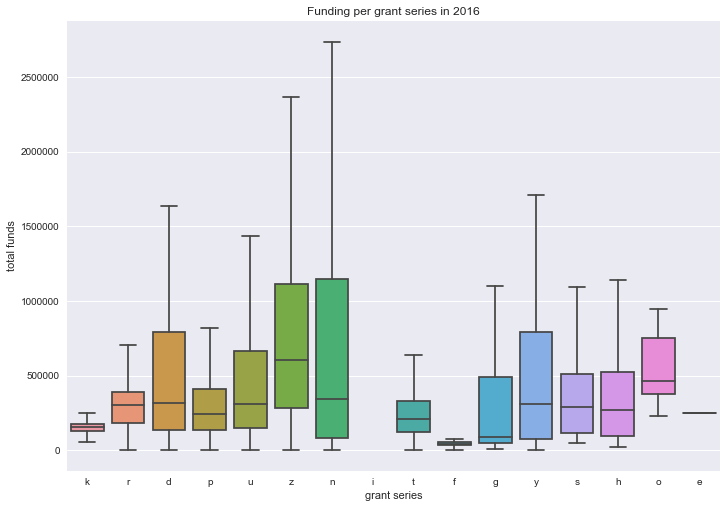

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = grants_analysis['series'], y = grants_analysis['funds'], data = grants_analysis,
           showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'total funds', title = 'Funding per grant series in 2016');

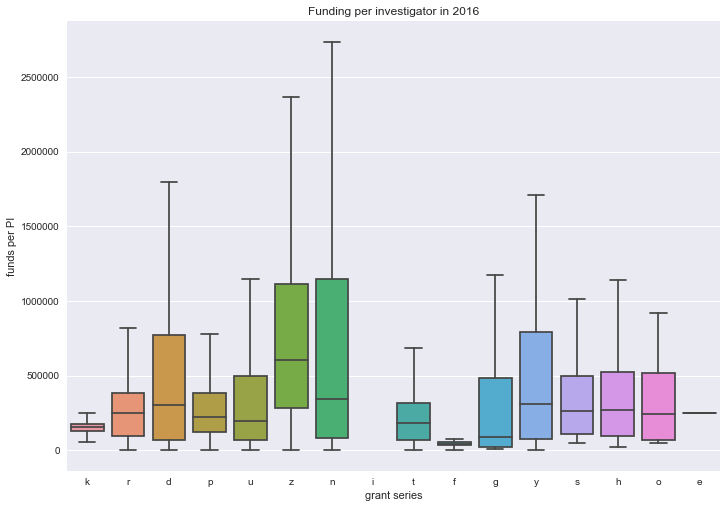

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = grants_analysis['series'], y = (grants_analysis['funds'] / grants_analysis['num_pis']), 
                data = grants_analysis, showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'funds per PI', title = 'Funding per investigator in 2016');

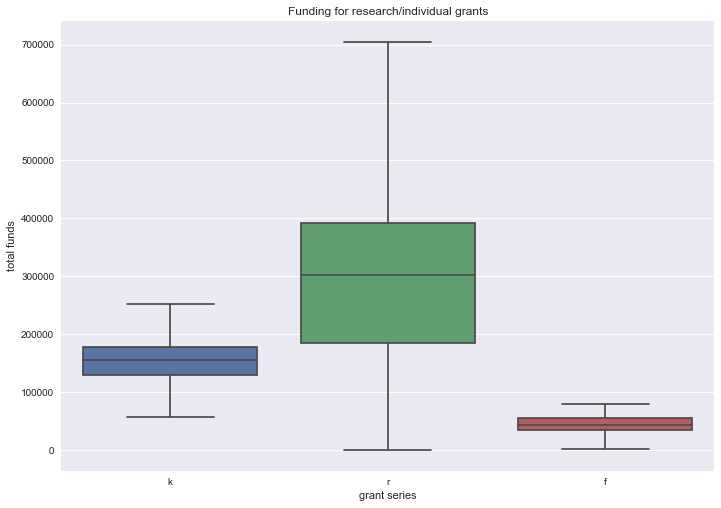

In [82]:
#individual grants: r, f, k
indiv_grants = grants_analysis.ix[(grants_analysis['series'] == 'r') | (grants_analysis['series'] == 'f') | 
                                  (grants_analysis['series'] == 'k')]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
p = sns.boxplot(x = indiv_grants['series'], y = indiv_grants['funds'], 
                data = indiv_grants, showfliers = False);
p.set(xlabel = 'grant series', ylabel = 'total funds', title = 'Funding for research/individual grants');

## Funding by institute 

In [114]:
institute_funds = pd.read_csv('institute_funds.csv', compression = 'gzip')
grants_per_inst = pd.DataFrame(institute_funds['institute'].value_counts())
institute_funds.head()
grants_per_inst.head()

,institute,funds
0,nigms,194460.0
1,ninds,335781.0
2,fic,146822.0
3,nida,75000.0
4,nimh,1593922.0


,institute
nci,11271
niaid,7716
nigms,7430
nhlbi,6143
niddk,5009


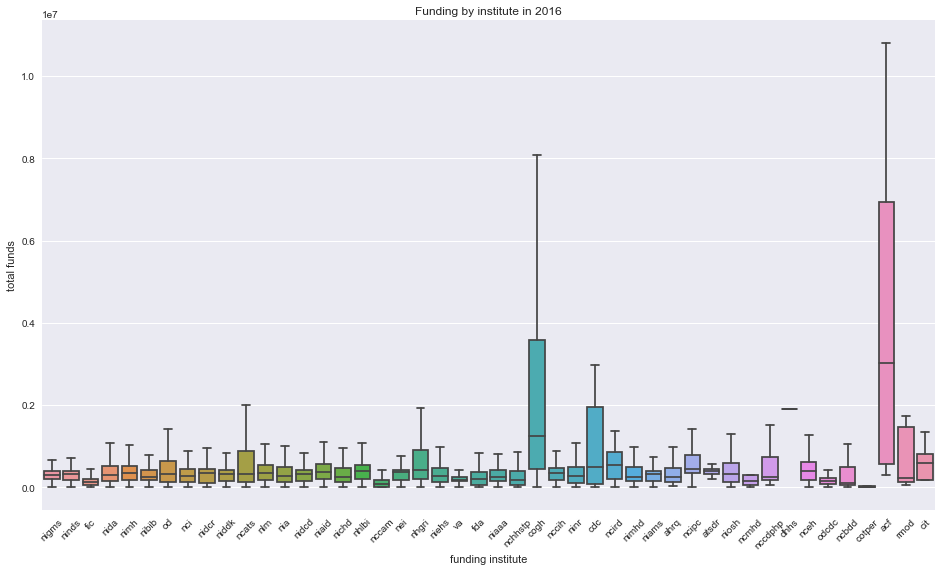

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.boxplot(x = institute_funds['institute'], y = institute_funds['funds'], data = institute_funds,
           showfliers = False);
_ = p.set(xlabel = 'funding institute', ylabel = 'total funds', title = 'Funding by institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

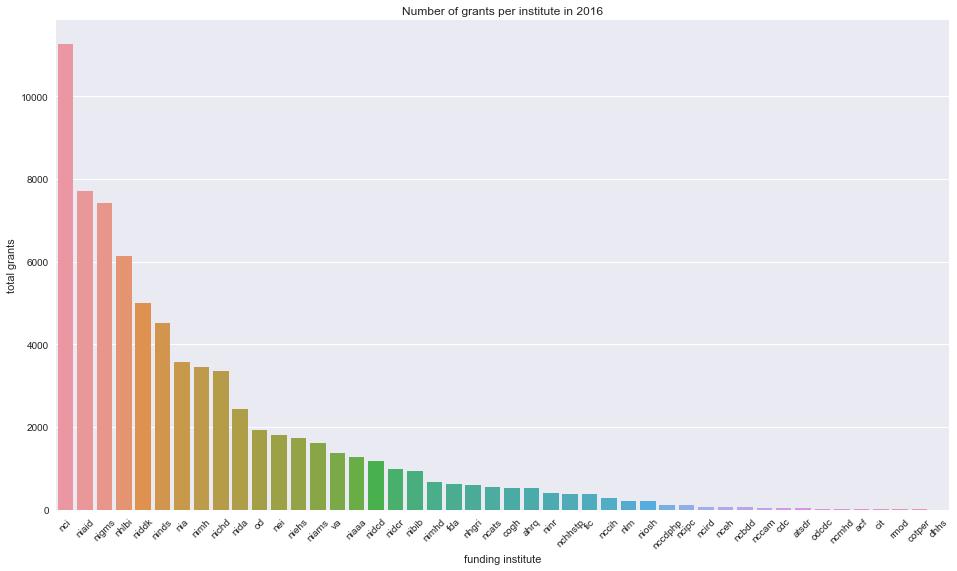

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.barplot(x = grants_per_inst.index, y = grants_per_inst['institute'], data = grants_per_inst);
_ = p.set(xlabel = 'funding institute', ylabel = 'total grants', title = 'Number of grants per institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

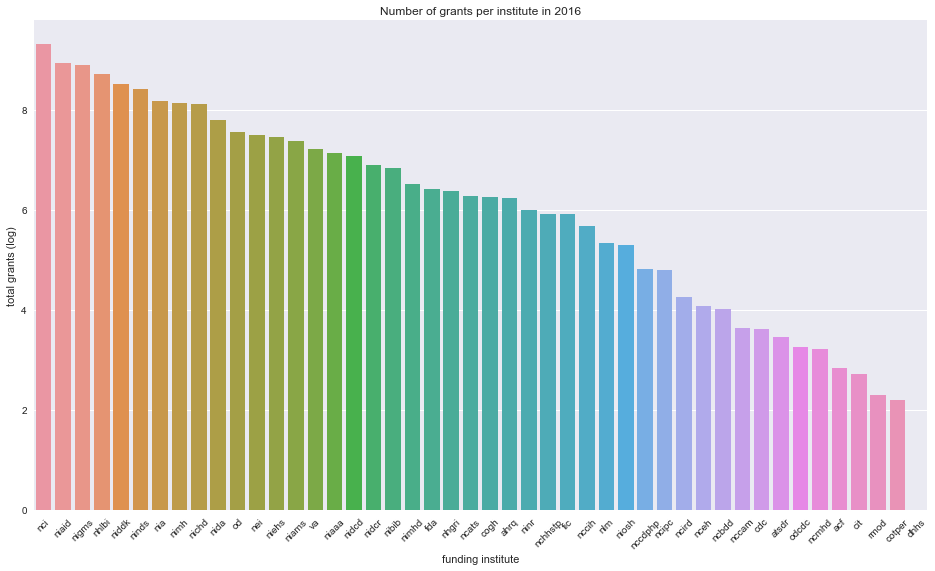

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9);
p = sns.barplot(x = grants_per_inst.index, y = np.log(grants_per_inst['institute']), data = grants_per_inst);
_ = p.set(xlabel = 'funding institute', ylabel = 'total grants (log)', title = 'Number of grants per institute in 2016');
for xlab in p.get_xticklabels():
    _ = xlab.set_rotation(45);

In [ ]:
#geospatial data: grants per region
#Questions for analysis: how many grants are solo vs. joint? how many PIs have solo vs. joint grants?
#How many grants per organization?
#Total costs, avg cost per PI, institution

## Groupby activity section

In [13]:
by_activity = grants_analysis.groupby('activity')
cost_activity = by_activity.sum().sort_values('funds', ascending = False)

In [14]:
s = pd.Series(by_activity.size(), name = 'num_grants')
cost_activity = pd.concat([cost_activity, s], axis = 1)
cost_activity['funds_per_grant'] = cost_activity['funds'] / cost_activity['num_grants']
cost_activity['pi_per_grant'] = cost_activity['num_pis'] / cost_activity['num_grants']
cost_activity.head()

,funds,num_pis,num_grants,funds_per_grant,pi_per_grant
d43,36571074.0,341,193,1.894874e+05,1.766839
d71,348784.0,29,15,2.325227e+04,1.933333
dp1,67354076.0,81,81,8.315318e+05,1.000000
dp2,134316415.0,68,68,1.975241e+06,1.000000
dp3,39468693.0,54,28,1.409596e+06,1.928571


In [15]:
#cost_activity.sort_values('num_pis', ascending = False)

,funds,num_pis,num_grants,funds_per_grant,pi_per_grant
r01,1.070060e+10,44670,30870,3.466344e+05,1.447036
u01,1.803347e+09,8483,3757,4.799964e+05,2.257919
r21,9.234054e+08,7556,5420,1.703700e+05,1.394096
u54,9.225557e+08,4877,2095,4.403607e+05,2.327924
p01,1.756735e+09,4414,3518,4.993562e+05,1.254690
p30,1.302126e+09,3915,3787,3.438412e+05,1.033800
u19,1.010786e+09,2955,1363,7.415890e+05,2.168012
t32,5.649902e+08,2949,2155,2.621764e+05,1.368445
zia,2.172337e+09,2818,2816,7.714266e+05,1.000710
r25,1.959151e+08,2424,1230,1.592806e+05,1.970732


In [16]:
#cost_activity['series'] = cost_activity.index
#for i in range(len(cost_activity)):
    #cost_activity['series'][i] = cost_activity['series'][i][0]

#cost_activity

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,funds,num_pis,num_grants,funds_per_grant,pi_per_grant,series
d43,3.657107e+07,341,193,1.894874e+05,1.766839,d
d71,3.487840e+05,29,15,2.325227e+04,1.933333,d
dp1,6.735408e+07,81,81,8.315318e+05,1.000000,d
dp2,1.343164e+08,68,68,1.975241e+06,1.000000,d
dp3,3.946869e+07,54,28,1.409596e+06,1.928571,d
dp5,3.090908e+07,79,79,3.912542e+05,1.000000,d
dp7,6.525132e+06,131,45,1.450029e+05,2.911111,d
e11,2.499930e+05,1,1,2.499930e+05,1.000000,e
f30,2.497845e+07,624,624,4.002957e+04,1.000000,f
f31,5.071261e+07,1419,1419,3.573828e+04,1.000000,f


In [31]:
by_series = cost_activity.groupby('series')
by_series_sum = cost_activity.groupby('series').sum()

In [42]:
by_grant_series['funds_per_grant'] = by_grant_series['funds'] / by_grant_series['num_grants']
by_grant_series['pi_per_grant'] = by_grant_series['num_pis'] / by_grant_series['num_grants']
by_grant_series

,funds,num_pis,num_grants,funds_per_grant,pi_per_grant
series,,,,,
d,3.154933e+08,783,509,6.198296e+05,1.538310
e,2.499930e+05,1,1,2.499930e+05,1.000000
f,1.411751e+08,3278,3276,4.309375e+04,1.000611
g,5.789439e+07,182,134,4.320477e+05,1.358209
h,2.453131e+07,70,70,3.504473e+05,1.000000
i,NaN,1711,1455,NaN,1.175945
k,6.536692e+08,4055,3871,1.688631e+05,1.047533
n,1.774000e+09,1464,1462,1.213406e+06,1.001368
o,3.533306e+07,134,46,7.681101e+05,2.913043
